In [156]:
### This script contains the following:

#### 1. Import libraries and data
#### 2. Data prep
#### 3. The elbow technique
#### 4. K-means clustering
    # Visualizations
    # Descriptive statistics and insights

In [157]:
### 1. Import libraries and data

# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pylab as pl

In [158]:
# CREATING PATH
path= r"C:\Users\Mallika\Documents\Career Foundry\Module2- Data Immersion\Achievement 6\6.1\flavors_of_cacao_cleaned.csv"

# IMPORTING DATA
df=pd.read_csv(path)

In [159]:
#### 2. Data prep

In [160]:
# Inspect the data
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Company  (Maker-if known)  1795 non-null   object 
 1   BarName                    1795 non-null   object 
 2   REF                        1795 non-null   int64  
 3   ReviewDate                 1795 non-null   int64  
 4   CocoaPercent               1795 non-null   float64
 5   Location                   1795 non-null   object 
 6   Rating                     1795 non-null   float64
 7   BeanType                   1795 non-null   object 
 8   BroadOrigin                1794 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 126.3+ KB
None
               REF   ReviewDate  CocoaPercent       Rating
count  1795.000000  1795.000000   1795.000000  1795.000000
mean   1035.904735  2012.325348     71.698329     3.185933
std     552.886365     2.927210 

In [161]:
df.head()

,Company (Maker-if known),BarName,REF,ReviewDate,CocoaPercent,Location,Rating,BeanType,BroadOrigin
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70.0,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,,Peru


In [162]:
df.dtypes

Company  (Maker-if known)     object
BarName                       object
REF                            int64
ReviewDate                     int64
CocoaPercent                 float64
Location                      object
Rating                       float64
BeanType                      object
BroadOrigin                   object
dtype: object

In [163]:
# 1. Normalize all column names: replace any \\xa0 with a normal space, then strip leading/trailing whitespace
df.columns = [col.replace('\xa0', ' ').strip() for col in df.columns]
print(df.columns)

Index(['Company  (Maker-if known)', 'BarName', 'REF', 'ReviewDate',
       'CocoaPercent', 'Location', 'Rating', 'BeanType', 'BroadOrigin'],
      dtype='object')


In [164]:
# 2. Now rename the cleaned header
df.rename(columns={'Company  (Maker-if known)': 'Company'}, inplace=True)
df.columns.tolist()

['Company',
 'BarName',
 'REF',
 'ReviewDate',
 'CocoaPercent',
 'Location',
 'Rating',
 'BeanType',
 'BroadOrigin']

In [165]:
df.head()

,Company,BarName,REF,ReviewDate,CocoaPercent,Location,Rating,BeanType,BroadOrigin
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70.0,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,,Peru


In [166]:
# Create a subset containing only numerical variables
df_numerical = df.drop(columns=['Company', 'REF', 'BarName', 'Location', 'BroadOrigin', 'BeanType'])

In [167]:
df_numerical.head()

,ReviewDate,CocoaPercent,Rating
0,2016,63.0,3.75
1,2015,70.0,2.75
2,2015,70.0,3.00
3,2015,70.0,3.50
4,2015,70.0,3.50


In [168]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numerical)

In [169]:
### 3. Elbow technique

In [170]:
# Define the number of potential clusters in the data
num_cl = range(1,10)

In [171]:
# Define a list of inertia values for each k-means clustering model
inertia = []

for i in num_cl:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_numerical)
    inertia.append(kmeans.inertia_)

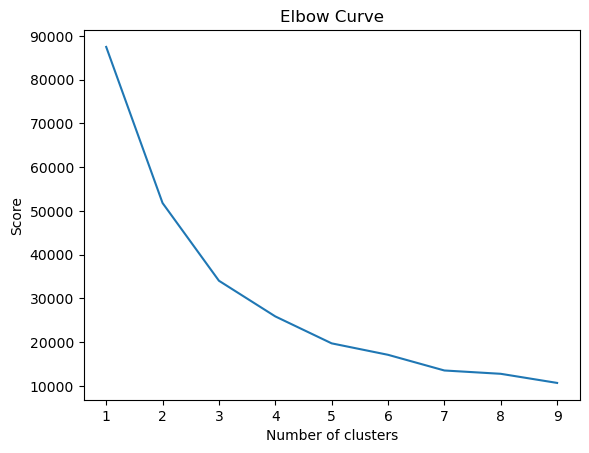

In [172]:
# Plot the scores to visualize the 'elbow'
pl.plot(num_cl,inertia)
pl.title('Elbow Curve')
pl.xlabel('Number of clusters')
pl.ylabel('Score')
pl.show()

In [173]:
# Note: The curve begins to flatten out around 5 clusters. After 5, the reduction in score becomes less significant and no steeps indicats that more clusters would greatly improve the model's fit. 
#The ideal number of clusters for this dataset is 5. 

In [174]:
### 4. K-means clustering

In [175]:
# Create the kmeans object
Kmeans = KMeans(n_clusters=5)

In [176]:
# Fit the k-means object to the dataframe
Kmeans.fit(df_numerical)

KMeans(n_clusters=5)

In [194]:
# Create new column in dataframe to show the clusters
df_numerical['clusters'] = Kmeans.fit_predict(df_numerical)
df_numerical.head()

,ReviewDate,CocoaPercent,Rating,clusters
0,2016,63.0,3.75,3
1,2015,70.0,2.75,0
2,2015,70.0,3.00,0
3,2015,70.0,3.50,0
4,2015,70.0,3.50,0


In [195]:
df_numerical['clusters'].value_counts()

clusters
0    758
4    417
2    347
3    229
1     44
Name: count, dtype: int64

In [197]:
#### Visualizations

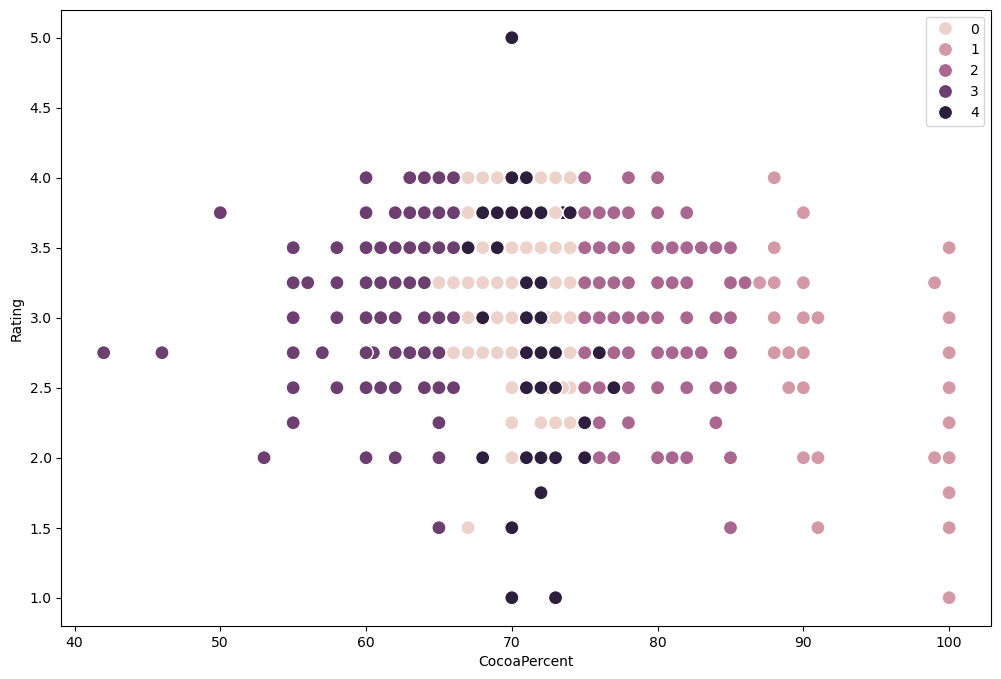

In [198]:
# Visualize the clusters in a scatterplot
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numerical['CocoaPercent'], y=df_numerical['Rating'], hue = Kmeans.labels_, s=100)

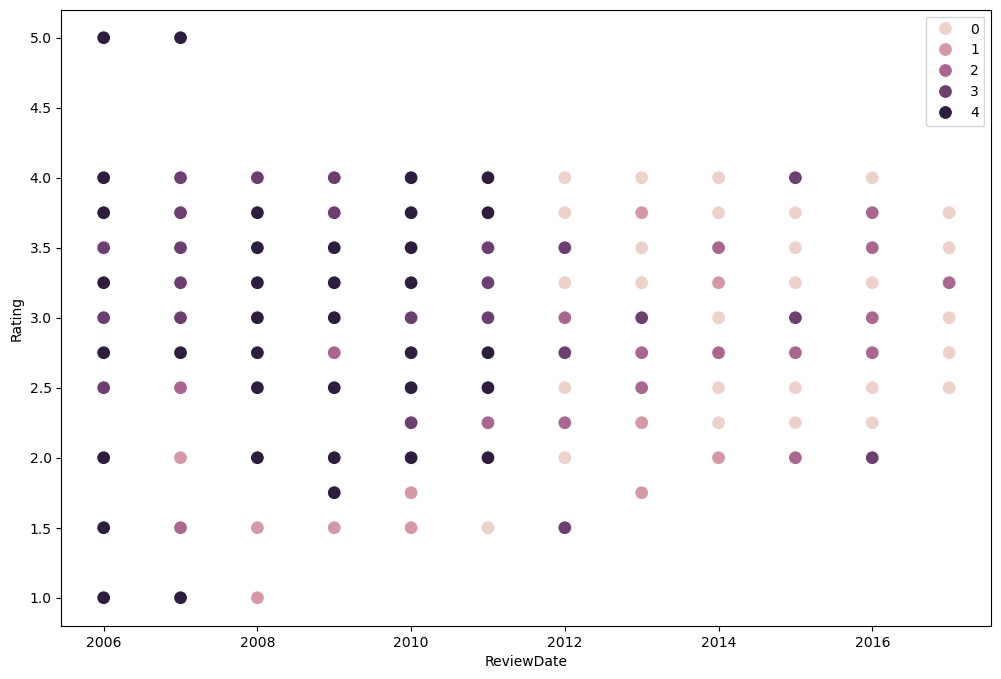

In [199]:
# Visualize the clusters in a scatterplot
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numerical['ReviewDate'], y=df_numerical['Rating'], hue = Kmeans.labels_, s=100)

In [200]:
# Calculate descriptive statistics for each cluster

df_numerical.loc[df_numerical['clusters'] == 4, 'clusters'] = 'dark purple'
df_numerical.loc[df_numerical['clusters'] == 3, 'clusters'] = 'purple'
df_numerical.loc[df_numerical['clusters'] == 2, 'clusters'] = 'light purple'
df_numerical.loc[df_numerical['clusters'] == 1, 'clusters'] = 'pink'
df_numerical.loc[df_numerical['clusters'] == 0, 'clusters'] = 'light pink'

C:\Users\Mallika\AppData\Local\Temp\ipykernel_8260\760072071.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'dark purple' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df_numerical.loc[df_numerical['clusters'] == 4, 'clusters'] = 'dark purple'


In [202]:
df_numerical.groupby('clusters').agg({'ReviewDate':['mean', 'median'], 
                         'CocoaPercent':['mean', 'median'], 
                         'Rating':['mean', 'median']})

ReviewDate         CocoaPercent           Rating       
                     mean  median         mean median      mean median
clusters                                                              
dark purple   2008.964029  2009.0    71.660671   71.0  3.194844   3.25
light pink    2014.217678  2014.0    70.326517   70.0  3.270119   3.25
light purple  2013.262248  2014.0    78.123919   77.0  3.102305   3.00
pink          2011.522727  2013.0    94.545455   95.0  2.607955   2.75
purple        2010.917031  2011.0    62.181223   64.0  3.128821   3.25

In [203]:
##Insights

In [204]:
## Dark Purple Cluster
# In this cluster rating mean is 3.194

In [205]:
## Light Purple Cluster
# Here CococaPercent percentage average is 78.12

In [206]:
## Purple Cluster
# in this cluster average review date is almost 2011, Cocoa Percent is 62.181 and Rating is 3.128

In [207]:
## Pink Cluster
# In this cluster average rating is 2.607

In [208]:
## Light Pink Cluster
#Here the mean year is 2014 and average rating is 3.27

In [210]:
#Notes from clusters:
#1 : For year 2011 the  average cocoa percent has been highest
#2 : 2009 and 2014 have been the best rating years
